<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

In [7]:
import pandas as pd

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read bookings data in a datagrame**

In [8]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')

**Explore bookings data**

In [10]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558.0,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010.0,10010.0
1,May012216558RT12,16558.0,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
2,May012216558RT13,16558.0,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000.0,9100.0
3,May012216558RT14,16558.0,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
4,May012216558RT15,16558.0,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0


In [11]:
df_bookings.shape

(11492, 12)

In [12]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4', nan], dtype=object)

In [13]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline', nan], dtype=object)

In [14]:
df_bookings.booking_platform.value_counts()

booking_platform
others            4732
makeyourtrip      2299
logtrip           1275
direct online     1092
tripster           820
journey            701
direct offline     572
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

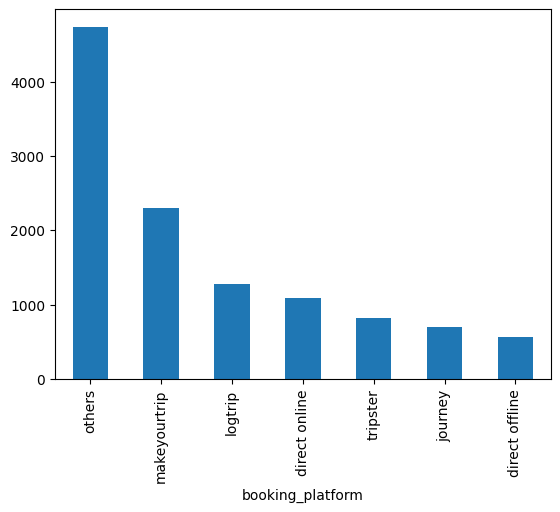

In [15]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [16]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,11491.000000,11488.000000,4797.000000,1.149100e+04,11491.000000
mean,17999.889914,2.028552,3.658537,1.944373e+04,12623.126099
std,1110.247385,1.024495,1.235988,3.037232e+05,6883.241393
min,16558.000000,-3.000000,1.000000,6.500000e+03,2600.000000
25%,16563.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11400.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Read rest of the files**

In [18]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [19]:
df_hotels.shape

(25, 4)

In [20]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [21]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

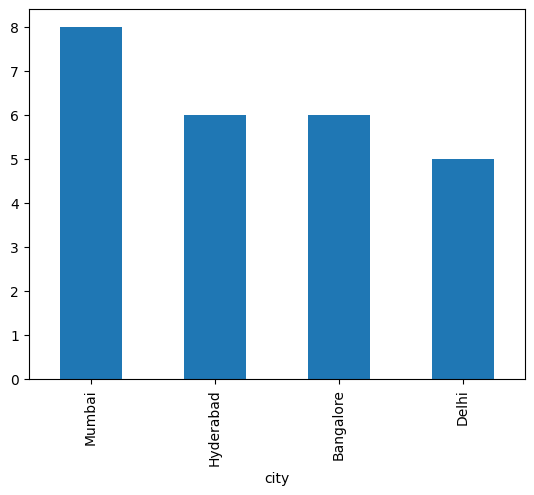

In [22]:
df_hotels.city.value_counts().plot(kind="bar")

***
**Explore aggregate bookings**
***

In [23]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


**1. Find out unique property ids in aggregate bookings dataset**

In [24]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

**2. Find out total bookings per property_id**

In [26]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**3. Find out days on which bookings are greater than capacity**

In [27]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**4. Find out properties that have highest capacity**

In [28]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

df_bookings.describe()

**(1) Clean invalid guests**

In [30]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558.0,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010.0,10010.0
3,May012216558RT14,16558.0,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100.0,3640.0


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [31]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [32]:
df_bookings.shape

(11486, 12)

**(2) Outlier removal in revenue generated**

In [33]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500.0, 28560000.0)

In [34]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(19446.358610482326, 13500.0)

In [35]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [36]:
higher_limit = avg + 3*std
higher_limit

930814.1340478883

In [37]:
lower_limit = avg - 3*std
lower_limit

-891921.4168269237

In [38]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [39]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558.0,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000.0,9100.0
111,May012216559RT32,16559.0,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000.0,28560.0
315,May012216562RT22,16562.0,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000.0,12600.0
562,May012217559RT118,17559.0,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000.0,4420.0


In [40]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(11482, 12)

In [41]:
df_bookings.revenue_realized.describe()

count    11482.000000
mean     12622.899495
std       6882.946850
min       2600.000000
25%       7600.000000
50%      11400.000000
75%      15300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [42]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33271.74004456424

In [43]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559.0,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760.0,38760.0
139,May012216559RT43,16559.0,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220.0,45220.0
143,May012216559RT47,16559.0,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530.0,35530.0
149,May012216559RT413,16559.0,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990.0,41990.0
222,May012216560RT45,16560.0,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580.0,34580.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11121,May082216559RT411,16559.0,17-04-22,8/5/2022,12/5/2022,3.0,RT4,makeyourtrip,5.0,Checked Out,35530.0,35530.0
11123,May082216559RT413,16559.0,1/5/2022,8/5/2022,10/5/2022,3.0,RT4,makeyourtrip,5.0,Checked Out,35530.0,35530.0
11194,May082216560RT41,16560.0,7/5/2022,8/5/2022,9/5/2022,5.0,RT4,others,1.0,Checked Out,34580.0,34580.0
11330,May082216562RT41,16562.0,5/5/2022,8/5/2022,13-05-22,6.0,RT4,direct online,NaN,Checked Out,37240.0,37240.0


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types.

In [44]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count     1363.000000
mean     23353.300073
std       9054.673816
min       7600.000000
25%      15960.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [45]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column.

In [46]:
df_bookings.isnull().sum()

booking_id              0
property_id             0
booking_date            0
check_in_date           0
checkout_date           0
no_guests               0
room_category           0
booking_platform        0
ratings_given        6689
booking_status          0
revenue_generated       0
revenue_realized        0
dtype: int64

Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

**(3) In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [47]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [48]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [49]:
df_agg_bookings.capacity.median()

25.0

In [50]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [51]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


**(4) In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [52]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [53]:
df_agg_bookings.shape

(9200, 5)

In [54]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

***
### ==> 3. Data Transformation
***

**Create occupancy percentage column**

In [57]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [58]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


Convert it to a percentage value

In [59]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [61]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [62]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
 5   occ_pct              9194 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 502.8+ KB


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

***
### ==> 4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [65]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [66]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [67]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [68]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [69]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.889643
Name: occ_pct, dtype: float64

In [70]:
df[df.room_class=="Standard"].occ_pct.mean()

57.88964285714285

**2. Print average occupancy rate per city**

In [71]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [72]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


In [73]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: occ_pct, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [75]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [76]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occ_pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [78]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday


In [79]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occ_pct, dtype: float64

**5: We got new data for the month of august. Append that to existing data**

In [81]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [82]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [83]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [84]:
df_august.shape

(7, 13)

In [85]:
df.shape

(6497, 14)

In [86]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6494,16563,31-Jul-22,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,16563,31-Jul-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [87]:
latest_df.shape

(6504, 15)

**6. Print revenue realized per city**

In [88]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558.0,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
4,May012216558RT15,16558.0,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0
5,May012216558RT16,16558.0,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100.0,9100.0
6,May012216558RT17,16558.0,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
7,May012216558RT18,16558.0,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100.0,9100.0


In [89]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [90]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558.0,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558.0,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558.0,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100.0,9100.0,Atliq Grands,Luxury,Delhi


In [91]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    34523895.0
Delhi        28297514.0
Hyderabad    26694910.0
Mumbai       55419813.0
Name: revenue_realized, dtype: float64

**7. Print month by month revenue**

In [92]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [93]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [94]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558.0,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558.0,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558.0,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100.0,9100.0,Atliq Grands,Luxury,Delhi


In [95]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [98]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11482 entries, 0 to 11481
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   booking_id         11482 non-null  object        
 1   property_id        11482 non-null  float64       
 2   booking_date       11482 non-null  object        
 3   check_in_date      11482 non-null  datetime64[ns]
 4   checkout_date      11482 non-null  object        
 5   no_guests          11482 non-null  float64       
 6   room_category      11482 non-null  object        
 7   booking_platform   11482 non-null  object        
 8   ratings_given      4793 non-null   float64       
 9   booking_status     11482 non-null  object        
 10  revenue_generated  11482 non-null  float64       
 11  revenue_realized   11482 non-null  float64       
 12  property_name      11482 non-null  object        
 13  category           11482 non-null  object        
 14  city  

In [100]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558.0,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558.0,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558.0,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100.0,9100.0,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558.0,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0,Atliq Grands,Luxury,Delhi


In [101]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11482 entries, 0 to 11481
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   booking_id         11482 non-null  object        
 1   property_id        11482 non-null  float64       
 2   booking_date       11482 non-null  object        
 3   check_in_date      11482 non-null  datetime64[ns]
 4   checkout_date      11482 non-null  object        
 5   no_guests          11482 non-null  float64       
 6   room_category      11482 non-null  object        
 7   booking_platform   11482 non-null  object        
 8   ratings_given      4793 non-null   float64       
 9   booking_status     11482 non-null  object        
 10  revenue_generated  11482 non-null  float64       
 11  revenue_realized   11482 non-null  float64       
 12  property_name      11482 non-null  object        
 13  category           11482 non-null  object        
 14  city  

In [102]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558.0,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010.0,10010.0,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558.0,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558.0,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010.0,10010.0,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [103]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    25221983.0
Jun 22    17426886.0
May 22    17901036.0
Name: revenue_realized, dtype: float64

**(8) Print revenue realized per hotel type**

In [105]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [106]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     2420970.0
Atliq Grands      7613470.0
Atliq Blu         9121570.0
Atliq Bay         9256497.0
Atliq City       10146665.0
Atliq Palace     10776278.0
Atliq Exotica    11214455.0
Name: revenue_realized, dtype: float64

**(8) Print average rating per city**

In [108]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2).sort_values()

city
Bangalore    3.43
Hyderabad    3.67
Mumbai       3.67
Delhi        3.84
Name: ratings_given, dtype: float64

**(9) Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

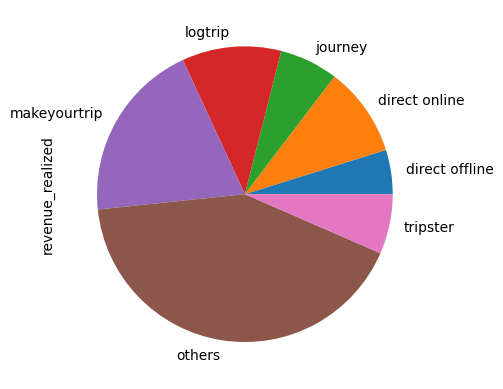

In [109]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")